In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 패키지 준비

In [2]:
!pip install tensorflow==2.3.0
!pip3 install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.4 MB 54 kB/s 
     |████████████████████████████████| 459 kB 36.3 MB/s 
     |████████████████████████████████| 20.1 MB 1.5 MB/s 
     |████████████████████████████████| 2.9 MB 36.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 505.3 MB 8.9 kB/s 
     |████████████████████████████████| 5.8 MB 54.1 MB/s 
     |████████████████████████████████| 438 kB 57.1 MB/s 
     |████████████████████████████████| 1.7 MB 39.0 MB/s 
     |████████████████████████████████| 15.7 MB 31.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.21.6 which is incompatible.
datascience 0.10.6 

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.layers import Lambda, Input, Dense
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.losses import mse, binary_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.python.keras import backend as K

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

# 데이터 4종 생성

## 원본3초

In [5]:
data = pd.read_csv('/content/drive/MyDrive/기계팀플/Data/features_3_sec_replaced.csv', encoding='utf-8-sig')
data.shape

(10000, 60)

## 원본3초+pca30

In [29]:
data = pd.read_csv('/content/drive/MyDrive/기계팀플/Data/features_3_sec_replaced.csv', encoding='utf-8-sig')
data = data.drop(columns=['filename', 'length', 'label'])
data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694


In [30]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(data)

In [31]:
pca = PCA(n_components=30)
pcs = pca.fit_transform(scaled_x)
pca_data = pd.DataFrame(data=pcs, columns = ['pc'+str(j) for j in range(30)])
pca_data.shape

(10000, 30)

In [27]:
pca_data.to_csv('/content/drive/MyDrive/기계팀플/Data/origin_PCA30.csv')

## 1D+pca30

In [33]:
data = pd.read_csv('/content/drive/MyDrive/기계팀플/Data/concat_features3.csv', encoding='utf-8-sig')
data = data.drop(columns=['filename', 'length'])
data.head()

,chroma_stft_mean0,chroma_stft_var0,rms_mean0,rms_var0,spectral_centroid_mean0,spectral_centroid_var0,spectral_bandwidth_mean0,spectral_bandwidth_var0,rolloff_mean0,rolloff_var0,...,mfcc16_mean9,mfcc16_var9,mfcc17_mean9,mfcc17_var9,mfcc18_mean9,mfcc18_var9,mfcc19_mean9,mfcc19_var9,mfcc20_mean9,mfcc20_var9
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,6.691686,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420
1,0.292987,0.082145,0.094924,0.003031,1373.437553,210606.446462,1929.319087,165808.594240,3187.907903,2.096863e+06,...,5.399943,42.760681,0.101109,62.984756,-0.026374,71.700882,-3.079430,50.402306,2.897624,31.121618
2,0.299589,0.083030,0.170790,0.001917,1396.794527,81945.617374,1517.311972,92242.679953,2552.761230,5.021407e+05,...,1.501840,39.777912,-9.870871,34.864491,-2.013198,24.143799,-4.399901,32.495110,-3.156466,38.718266
3,0.387297,0.092417,0.149871,0.005382,1061.389626,128482.413202,1665.487663,123692.389644,2089.548903,1.090108e+06,...,1.005781,27.606752,-3.242399,29.266932,-0.895666,40.667355,-1.266579,18.778711,-0.982145,39.182232
4,0.281015,0.081816,0.069944,0.001954,1378.200657,89462.647415,1548.954870,52114.315750,2536.362868,6.135842e+05,...,-6.492939,57.985260,-8.449270,104.729286,3.810413,55.024506,-8.580989,51.179756,-13.261078,74.256371


In [34]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(data)

In [35]:
pca = PCA(n_components=30)
pcs = pca.fit_transform(scaled_x)
pca_data = pd.DataFrame(data=pcs, columns = ['pc'+str(j) for j in range(30)])
pca_data.shape

(1000, 30)

In [36]:
pca_data.to_csv('/content/drive/MyDrive/기계팀플/Data/1D_PCA30.csv')

## 1D+vae

### 준비 함수

In [ ]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

def plot_results(models,
                 data,
                 batch_size=128,
                 model_name="vae_mlp_plot"):

    encoder, decoder = models
    x_test, y_test = data
    xmin = ymin = -4
    xmax = ymax = +4
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "vae_mean.png")
    # display a 2D plot of the digit classes in the latent space
    z, _, _ = encoder.predict(x_test,
                              batch_size=batch_size)
    plt.figure(figsize=(12, 10))

    # axes x and y ranges
    axes = plt.gca()
    axes.set_xlim([xmin,xmax])
    axes.set_ylim([ymin,ymax])

    # subsample to reduce density of points on the plot
    z = z[0::2]
    y_test = y_test[0::2]
    plt.scatter(z[:, 0], z[:, 1], marker="")
    for i, digit in enumerate(y_test):
        axes.annotate(digit, (z[i, 0], z[i, 1]))
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

### vae

In [ ]:
LATENT_DIM = 2
PATH = '/content/drive/MyDrive/기계팀플/'
ORIGINAL_DIM = 60

# 3초 데이터 병합
data = pd.read_csv('/content/drive/MyDrive/기계팀플/concat_features3.csv',encoding='utf-8')
X = data.iloc[:,:-1]
Y = data['label']
X['filename'] = 0
temp = pd.DataFrame(X['filename'])
X['padding'] = temp
X = X.values.reshape(-1, ORIGINAL_DIM).astype('float32')
X = X / 255

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)


# VAE_MLP
input_shape = (ORIGINAL_DIM, )
intermediate_dim = 30
batch_size = 128
latent_dim = LATENT_DIM
epochs = 50

inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

z = Lambda(sampling,
          output_shape=(latent_dim,),
          name='z')([z_mean, z_log_var])

# instantiate encoder
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# decoder model building
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(ORIGINAL_DIM, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')

outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp_model'+str(latent_dim))

if __name__ == '__main__':
  parser = argparse.ArgumentParser()  # 파서 만들기
  help_ = "Load tf model trained weights"
  parser.add_argument("-w", "--weights", help=help_)  # 인자 추가
  help_ = "Use binary cross entropy instead of mse (default)"
  parser.add_argument("--bce", help=help_, action='store_true')   # bce가 쓰이면 True로 저장됨
  args = parser.parse_args('')

  models = (encoder, decoder)
  data = (x_test, y_test)

  # VAE loss = mse_loss or xent_loss + kl_loss
  if args.bce:
      reconstruction_loss = binary_crossentropy(inputs,outputs)
  else:
      reconstruction_loss = mse(inputs, outputs)

  reconstruction_loss *= ORIGINAL_DIM
  kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
  kl_loss = K.sum(kl_loss, axis=-1)
  kl_loss *= -0.5

  vae_loss = K.mean(reconstruction_loss + kl_loss)
  vae.add_loss(vae_loss)
  vae.compile(optimizer='adam')
  # vae.summary()

  save_dir ="vae_mlp_weights"+str(latent_dim)
  if not os.path.isdir(save_dir):
      os.makedirs(save_dir)
  if args.weights:
      filepath = os.path.join(save_dir, args.weights)
      vae = vae.load_weights(filepath)
  else:
      # train the autoencoder
      vae.fit(x_train,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(x_test, None))
      filepath = os.path.join(save_dir, 'vae_mlp.tf')
      vae.save_weights(filepath)
      vae.save('/content/drive/MyDrive/기계팀플/vae_mlp_2.h5')
      encoder.save('/content/drive/MyDrive/기계팀플/vae_encoder_2.h5')
      encoder.save_weights('/content/drive/MyDrive/기계팀플/encoder_weights_2.h5')

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 60)]         0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           1830        encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            62          dense_2[0][0]                    
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            62          dense_2[0][0]                    
____________________________________________________________________________________________

In [ ]:
vae_encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
vae_encoder.load_weights('/content/drive/MyDrive/기계팀플/encoder_weights_2.h5') 
vae_encoder.summary()
_, _, z = vae_encoder.predict(X, batch_size = 128)
z

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 60)]         0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           1830        encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            62          dense_2[0][0]                    
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            62          dense_2[0][0]                    
____________________________________________________________________________________________

array([[-0.00683469, -0.28512862],
       [-1.1831669 ,  0.519861  ],
       [-0.46935475, -1.1770178 ],
       ...,
       [-0.4212625 , -0.70264965],
       [-1.029834  , -0.89480186],
       [ 0.8554908 , -1.205609  ]], dtype=float32)

In [ ]:
result = pd.DataFrame(z)
# result.to_csv('/content/drive/MyDrive/기계팀플/차원축소(최최종).csv', encoding='utf-8')
result

,0,1
0,-0.006835,-0.285129
1,-1.183167,0.519861
2,-0.469355,-1.177018
3,-0.245879,0.184174
4,-1.408787,0.967209
...,...,...
9995,-0.282159,-2.002726
9996,-0.275977,-0.234509
9997,-0.421263,-0.702650
9998,-1.029834,-0.894802


# 분류모델 학습

## 학습 준비

In [ ]:
# train, test 데이터 준비

# 원본3초
# X = pd.read_csv('/content/drive/MyDrive/기계팀플/Code/깃허브용코드(제출최최종)/데이터 4종/origin.csv',index_col=0)

# 원본3초+pca30
# X = pd.read_csv('/content/drive/MyDrive/기계팀플/Code/깃허브용코드(제출최최종)/데이터 4종/origin_PCA.csv',index_col=0)

# 1d+pca30
# X = pd.read_csv('/content/drive/MyDrive/기계팀플/Code/깃허브용코드(제출최최종)/데이터 4종/1D_PCA.csv',index_col=0)

# 1d+vae
# X = pd.read_csv('/content/drive/MyDrive/기계팀플/Code/깃허브용코드(제출최최종)/데이터 4종/1D_VAE.csv',index_col=0)

Y = pd.read_csv('/content/drive/MyDrive/기계팀플/concat_features3.csv', encoding='utf-8')
Y = Y['label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2022)

In [ ]:
accs = []

def model_assess(model, x_test, y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  F1 = f1_score(y_test, y_pred, average='micro')
  accs.append(accuracy)

  # 혼돈행렬
  con_matr = confusion_matrix(y_test, y_pred) 
  print(classification_report(y_test, y_pred))
  plt.figure(figsize = (16, 9))
  sns.heatmap(con_matr, cmap="Blues", annot=True, 
              xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
              yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);

  print('Accuracy:{:.4f}'.format(accuracy))
  print('F1: {:.4f}'.format(F1))

## 모델 학습(하이퍼 파라미터 튜닝 포함)

### Naive Bayes

파라미터 설명 참고<br>
prior: https://todayisbetterthanyesterday.tistory.com/18 <br>
var_smoothing: https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba


최적 하이퍼 파라미터:  {'var_smoothing': 1.0}
최고 예측 정확도: 0.1025
예측 정확도: 0.0895
              precision    recall  f1-score   support

       blues       0.11      0.13      0.12       187
   classical       0.12      0.04      0.06       210
     country       0.09      0.30      0.14       177
       disco       0.00      0.00      0.00       206
      hiphop       0.25      0.03      0.05       199
        jazz       0.09      0.40      0.14       175
       metal       0.00      0.00      0.00       227
         pop       0.00      0.00      0.00       210
      reggae       0.00      0.00      0.00       214
        rock       0.07      0.09      0.08       195

    accuracy                           0.09      2000
   macro avg       0.07      0.10      0.06      2000
weighted avg       0.07      0.09      0.05      2000

Accuracy:0.0895
F1: 0.0895


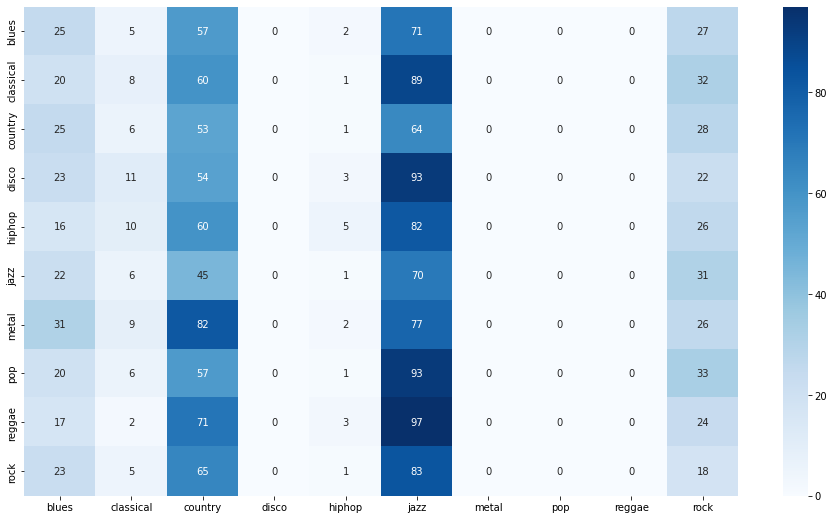

In [ ]:
params = {'var_smoothing': np.logspace(0,-100, num=100)}

nb = GaussianNB() 
grid_cv = GridSearchCV(nb, param_grid = params, cv = 3, n_jobs = -1) # n_jobs: cpu 개수, -1이면 모든 cpu 사용, colab은 2개, cv: 교차검증 분할 개수
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# 최적 하이퍼 파라미터로 모델 학습, test data 예측 성능 확인
nb_clf = GaussianNB(var_smoothing=grid_cv.best_params_.get('var_smoothing'))
nb_clf.fit(X_train, y_train)
pred = nb_clf.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

model_assess(nb_clf, X_test, y_test, pred)

### Stochastic Gradient Descent

최적 하이퍼 파라미터:  {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'none'}
최고 예측 정확도: 0.1029
예측 정확도: 0.0980
              precision    recall  f1-score   support

       blues       0.00      0.00      0.00       187
   classical       0.00      0.00      0.00       210
     country       0.11      0.04      0.06       177
       disco       0.08      0.00      0.01       206
      hiphop       0.00      0.00      0.00       199
        jazz       0.09      0.25      0.14       175
       metal       0.00      0.00      0.00       227
         pop       0.10      0.58      0.17       210
      reggae       0.00      0.00      0.00       214
        rock       0.08      0.12      0.10       195

    accuracy                           0.10      2000
   macro avg       0.05      0.10      0.05      2000
weighted avg       0.05      0.10      0.05      2000

Accuracy:0.0980
F1: 0.0980


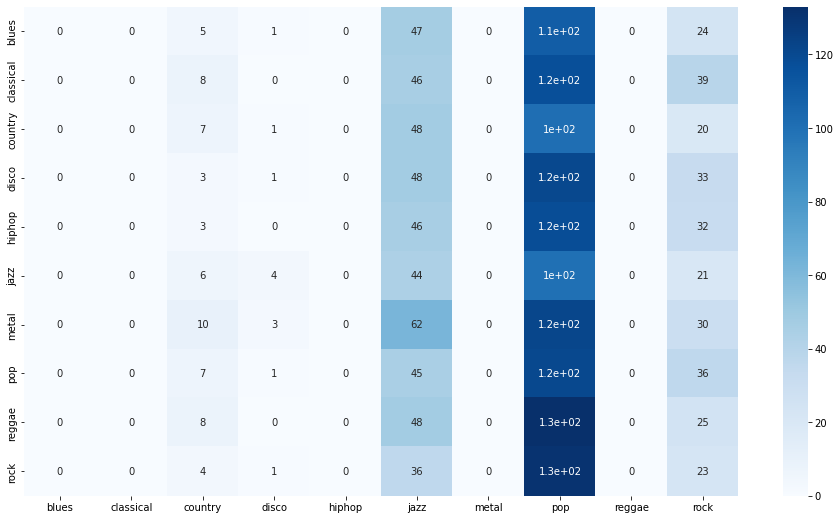

In [ ]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.00005, 0.0001, 0.001],
    "penalty" : ["none"],
}

sgd = SGDClassifier(max_iter=5000, random_state=0)
grid_cv = GridSearchCV(sgd, param_grid = params, cv = 3, n_jobs = -1) # cv: 교차검증 분할 개수
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# 최적 하이퍼 파라미터로 모델 학습, test data 예측 성능 확인
sgd_clf = SGDClassifier(alpha=grid_cv.best_params_.get('alpha'), loss=grid_cv.best_params_.get('loss'), penalty=grid_cv.best_params_.get('none'))
sgd_clf.fit(X_train, y_train)
pred = sgd_clf.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

model_assess(sgd_clf, X_test, y_test, pred)

### KNN

최적 하이퍼 파라미터:  {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
최고 예측 정확도: 0.1055
예측 정확도: 0.0935
              precision    recall  f1-score   support

       blues       0.07      0.15      0.10       187
   classical       0.09      0.14      0.11       210
     country       0.08      0.15      0.11       177
       disco       0.11      0.14      0.12       206
      hiphop       0.08      0.09      0.08       199
        jazz       0.07      0.07      0.07       175
       metal       0.10      0.07      0.08       227
         pop       0.11      0.05      0.07       210
      reggae       0.22      0.07      0.10       214
        rock       0.15      0.02      0.04       195

    accuracy                           0.09      2000
   macro avg       0.11      0.09      0.09      2000
weighted avg       0.11      0.09      0.09      2000

Accuracy:0.0935
F1: 0.0935


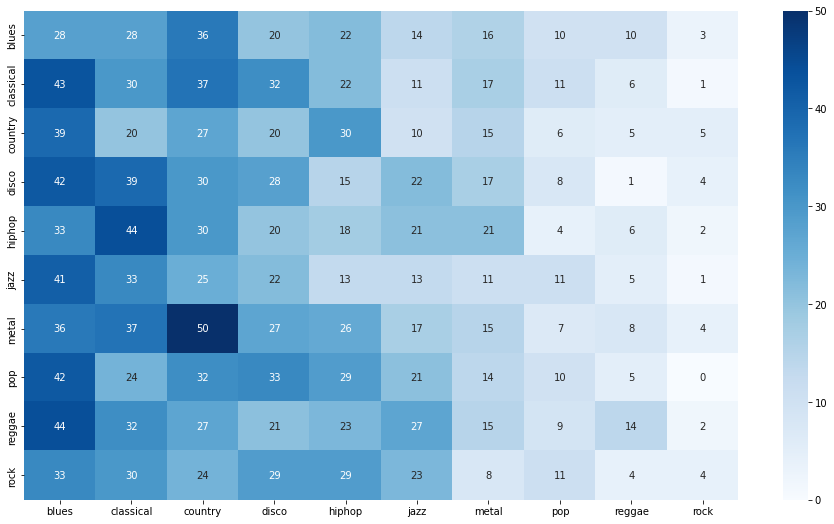

In [ ]:
params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid_cv = GridSearchCV(knn, param_grid = params, cv = 3, n_jobs = -1) # cv: 교차검증 분할 개수
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# 최적 하이퍼 파라미터로 모델 학습, test data 예측 성능 확인
knn_clf = KNeighborsClassifier(metric=grid_cv.best_params_.get('metric'), n_neighbors=grid_cv.best_params_.get('n_neighbors'), weights=grid_cv.best_params_.get('weights'))
knn_clf.fit(X_train, y_train)
pred = knn_clf.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

model_assess(knn_clf, X_test, y_test, pred)

### Decission trees

최적 하이퍼 파라미터:  {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4}
최고 예측 정확도: 0.1075
예측 정확도: 0.1085
              precision    recall  f1-score   support

       blues       0.08      0.01      0.02       187
   classical       0.12      0.11      0.11       210
     country       0.07      0.01      0.01       177
       disco       0.12      0.14      0.13       206
      hiphop       0.05      0.01      0.02       199
        jazz       0.06      0.01      0.01       175
       metal       0.33      0.01      0.03       227
         pop       0.10      0.01      0.02       210
      reggae       0.18      0.04      0.07       214
        rock       0.10      0.74      0.18       195

    accuracy                           0.11      2000
   macro avg       0.12      0.11      0.06      2000
weighted avg       0.13      0.11      0.06      2000

Accuracy:0.1085
F1: 0.1085


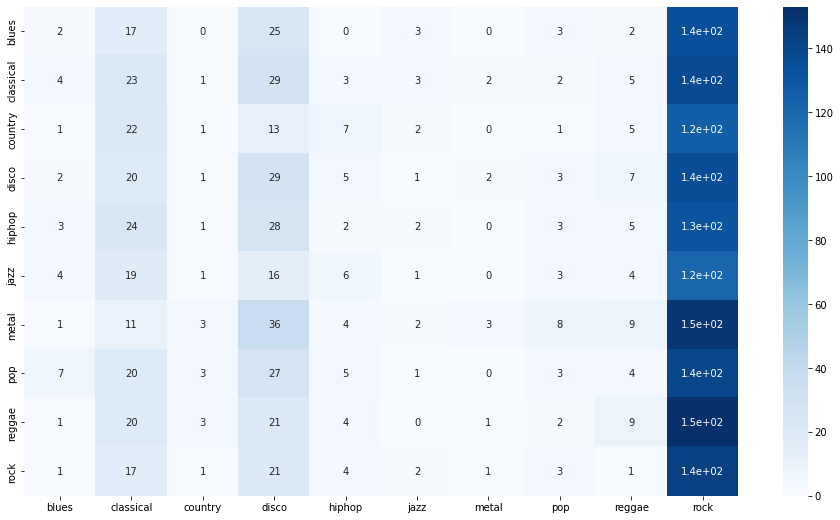

In [ ]:
params = {
    'max_depth' : list(range(5, 20, 1)),
    'min_samples_leaf' : [1, 2, 4, 8],
    'min_samples_split' : [1, 2, 4, 8],
    'max_features' : ["None", "sqrt", "log"]
}

tree = DecisionTreeClassifier()
grid_cv = GridSearchCV(tree, param_grid = params, cv = 3, n_jobs = -1) # cv: 교차검증 분할 개수
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# 최적 하이퍼 파라미터로 모델 학습, test data 예측 성능 확인
dt_clf = DecisionTreeClassifier(max_depth=grid_cv.best_params_.get('max_depth') , max_features=grid_cv.best_params_.get('max_features'), min_samples_leaf=grid_cv.best_params_.get('min_samples_leaf'), min_samples_split=grid_cv.best_params_.get('min_samples_split'))
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

model_assess(dt_clf, X_test, y_test, pred)

### Random Forest

In [ ]:
params = {
    'n_estimators' : [10, 100],
    'max_depth' : list(range(10, 60, 5)),
    'min_samples_leaf' : [1, 2, 4, 8],
    'min_samples_split' : [1, 2, 4, 8]
}

RF = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(RF, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# 최적 하이퍼 파라미터로 모델 학습, test data 예측 성능 확인
rf_clf = RandomForestClassifier(max_depth=grid_cv.best_params_.get('max_depth'), min_samples_leaf=grid_cv.best_params_.get('min_samples_leaf'), min_samples_split=grid_cv.best_params_.get('min_samples_split'), n_estimators=grid_cv.best_params_.get('n_estimators'))
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

최적 하이퍼 파라미터:  {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
최고 예측 정확도: 0.1049
예측 정확도: 0.1005


              precision    recall  f1-score   support

       blues       0.08      0.09      0.09       187
   classical       0.08      0.07      0.07       210
     country       0.10      0.12      0.11       177
       disco       0.09      0.09      0.09       206
      hiphop       0.10      0.10      0.10       199
        jazz       0.06      0.07      0.07       175
       metal       0.13      0.11      0.12       227
         pop       0.12      0.10      0.11       210
      reggae       0.10      0.10      0.10       214
        rock       0.14      0.15      0.14       195

    accuracy                           0.10      2000
   macro avg       0.10      0.10      0.10      2000
weighted avg       0.10      0.10      0.10      2000

Accuracy:0.1005
F1: 0.1005


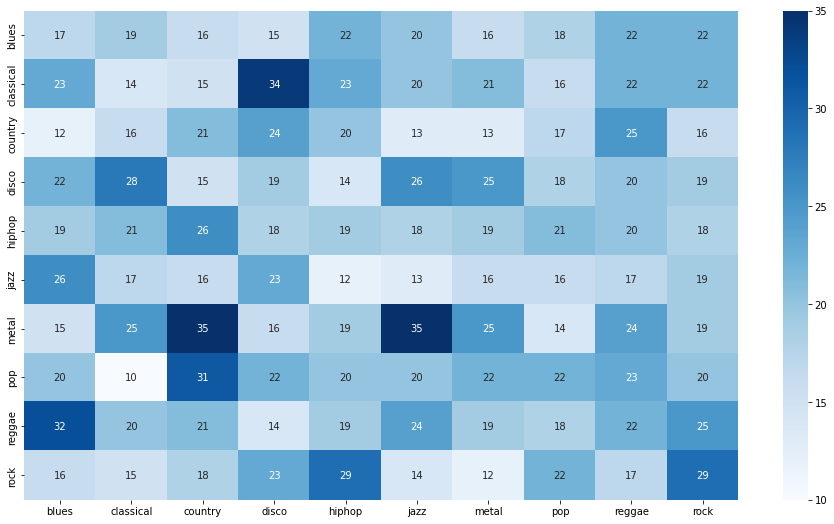

In [ ]:
model_assess(rf_clf, X_test, y_test, pred)

<strong>n_estimators: 랜덤 포레스트 안의 결정 트리 갯수<br></strong>
n_estimators(결정 트리)가 많을수록 더 깔끔한 Decision Boundary 얻을 수 있으나, 그만큼 메모리와 훈련 시간 증가

### SVM

최적 하이퍼 파라미터:  {'C': 3.0, 'gamma': 0.01, 'kernel': 'rbf'}
최고 예측 정확도: 0.1066
예측 정확도: 0.0925
              precision    recall  f1-score   support

       blues       0.11      0.12      0.11       187
   classical       0.00      0.00      0.00       210
     country       0.09      0.31      0.14       177
       disco       0.00      0.00      0.00       206
      hiphop       0.00      0.00      0.00       199
        jazz       0.09      0.62      0.16       175
       metal       0.00      0.00      0.00       227
         pop       0.00      0.00      0.00       210
      reggae       0.00      0.00      0.00       214
        rock       0.00      0.00      0.00       195

    accuracy                           0.09      2000
   macro avg       0.03      0.10      0.04      2000
weighted avg       0.03      0.09      0.04      2000

Accuracy:0.0925
F1: 0.0925


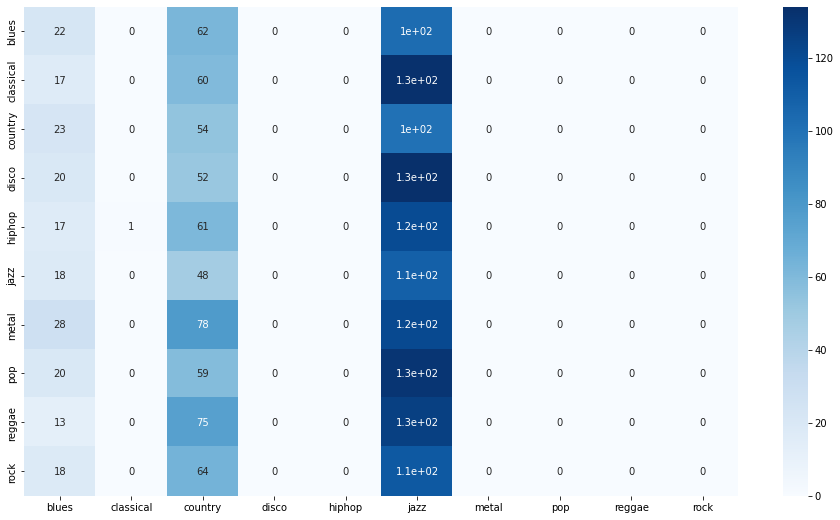

In [ ]:
param_grid = [
              {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000.]},
              {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100.], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0]}
]

svm_clf = SVC()
grid_cv = GridSearchCV(svm_clf, param_grid, cv=3)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# 최적 하이퍼 파라미터로 모델 학습, test data 예측 성능 확인
svm_clf = SVC(C=grid_cv.best_params_.get('C'), gamma=grid_cv.best_params_.get('gamma'), kernel=grid_cv.best_params_.get('kernel'))
svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

model_assess(svm_clf, X_test, y_test, pred)

### Logistic Regression

최적 하이퍼 파라미터:  {'C': 0.1, 'penalty': 'l2'}
최고 예측 정확도: 0.1041
예측 정확도: 0.0960
              precision    recall  f1-score   support

       blues       0.09      0.26      0.14       187
   classical       0.18      0.07      0.10       210
     country       0.09      0.39      0.15       177
       disco       0.00      0.00      0.00       206
      hiphop       0.17      0.04      0.06       199
        jazz       0.09      0.27      0.13       175
       metal       0.00      0.00      0.00       227
         pop       0.08      0.00      0.01       210
      reggae       0.09      0.02      0.03       214
        rock       0.50      0.01      0.01       195

    accuracy                           0.10      2000
   macro avg       0.13      0.11      0.06      2000
weighted avg       0.13      0.10      0.06      2000

Accuracy:0.0960
F1: 0.0960


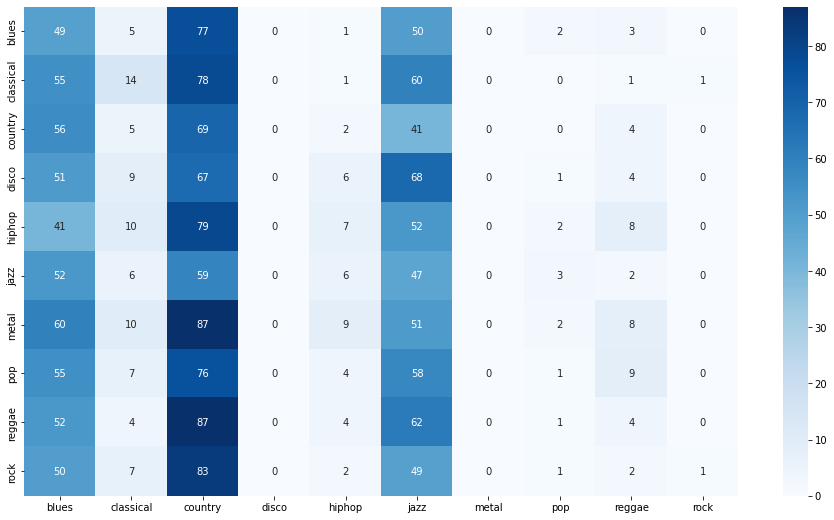

In [ ]:
param_grid = {'penalty': ['l2', 'l1'],
              'C': [0.01, 0.1, 1, 5, 10]} # C: 규제 강도 조정하는 a의 역수

lg_reg = LogisticRegression()
grid_cv = GridSearchCV(lg_reg, param_grid, cv=3)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# 최적 하이퍼 파라미터로 모델 학습, test data 예측 성능 확인
lg_clf = LogisticRegression(C=grid_cv.best_params_.get('C'), penalty=grid_cv.best_params_.get('penalty'))
lg_clf.fit(X_train, y_train)
pred = lg_clf.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

model_assess(lg_clf, X_test, y_test, pred)

### Neural Nets

최적 하이퍼 파라미터:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}
최고 예측 정확도: 0.1080
예측 정확도: 0.0935
              precision    recall  f1-score   support

       blues       0.07      0.09      0.08       187
   classical       0.00      0.00      0.00       210
     country       0.09      0.45      0.15       177
       disco       0.10      0.07      0.08       206
      hiphop       0.00      0.00      0.00       199
        jazz       0.11      0.13      0.12       175
       metal       0.00      0.00      0.00       227
         pop       0.12      0.02      0.03       210
      reggae       0.00      0.00      0.00       214
        rock       0.10      0.26      0.14       195

    accuracy                           0.09      2000
   macro avg       0.06      0.10      0.06      2000
weighted avg       0.06      0.09      0.06      2000

Accuracy:0.0935
F1: 0.0935


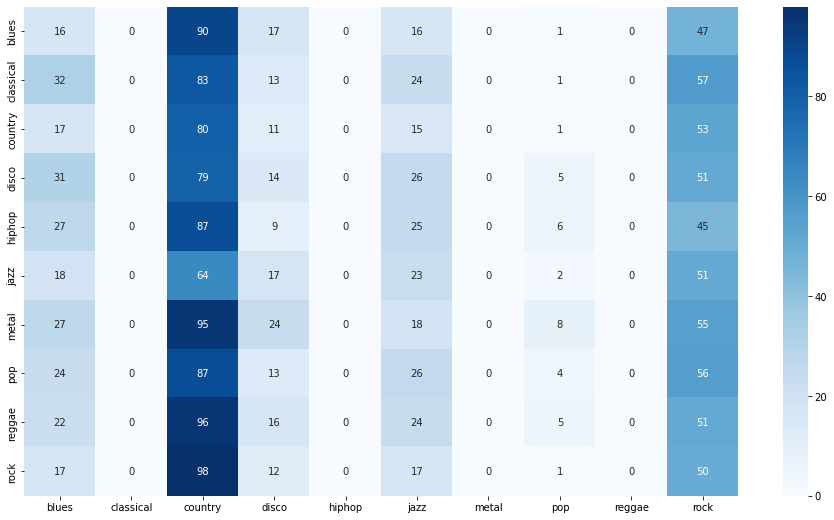

In [ ]:
param_grid = {'learning_rate': ["constant", "adaptive"],
              'hidden_layer_sizes': [(10,), (50,),(100,)], # 은닉층 크기
              'alpha': [0.0001, 0.001, 0.005], # 신경망 내 정규화 파라미터
              'activation': ["logistic", "relu", "Tanh"],
              'solver': ['sgd', 'lbfgs']} # 경사하강법 알고리즘

nn_ = MLPClassifier()
grid_cv = GridSearchCV(nn_, param_grid, cv=3)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# 최적 하이퍼 파라미터로 모델 학습, test data 예측 성능 확인
nn_clf = MLPClassifier(activation=grid_cv.best_params_.get('activation'), alpha=grid_cv.best_params_.get('alpha'), hidden_layer_sizes=grid_cv.best_params_.get('hidden_layer_sizes'), learning_rate=grid_cv.best_params_.get('learning_rate'), solver=grid_cv.best_params_.get('solver'))
nn_clf.fit(X_train, y_train)
pred = nn_clf.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

model_assess(nn_clf, X_test, y_test, pred)

### XGB

최적 하이퍼 파라미터:  {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10}
최고 예측 정확도: 0.1039
예측 정확도: 0.1010
              precision    recall  f1-score   support

       blues       0.08      0.04      0.05       187
   classical       0.10      0.15      0.12       210
     country       0.10      0.05      0.06       177
       disco       0.08      0.05      0.06       206
      hiphop       0.08      0.05      0.06       199
        jazz       0.09      0.07      0.08       175
       metal       0.22      0.03      0.05       227
         pop       0.11      0.16      0.13       210
      reggae       0.07      0.05      0.06       214
        rock       0.12      0.37      0.18       195

    accuracy                           0.10      2000
   macro avg       0.10      0.10      0.08      2000
weighted avg       0.11      0.10      0.08      2000

Accuracy:0.1010
F1: 0.1010


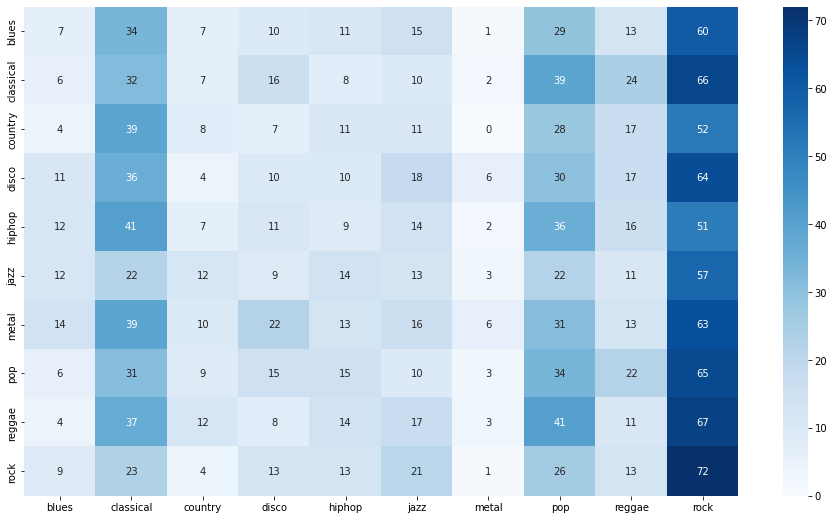

In [ ]:
param_grid = {'max_depth' : [3, 4, 5, 6], # 트리 최대 깊이
              'n_estimators': [10, 50, 100],
              'learning_rate':[0.01, 0.05, 0.1],
              'gamma': [0.5, 1]} # 트리에서 추가로 가지를 나눌지 결정 -> 값이 클수록 과적합 감소 효과

xgb_ = XGBClassifier()
grid_cv = GridSearchCV(xgb_, param_grid, cv=3)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# 최적 하이퍼 파라미터로 모델 학습, test data 예측 성능 확인
xgb_clf = XGBClassifier(gamma=grid_cv.best_params_.get('gamma'), learning_rate=grid_cv.best_params_.get('learning_rate'), max_depth=grid_cv.best_params_.get('max_depth'), n_estimators=grid_cv.best_params_.get('n_estimators'))
xgb_clf.fit(X_train, y_train)
pred = xgb_clf.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

model_assess(xgb_clf, X_test, y_test, pred)

### XGBRF

최적 하이퍼 파라미터:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10}
최고 예측 정확도: 0.1010
예측 정확도: 0.1025
              precision    recall  f1-score   support

       blues       0.12      0.09      0.10       187
   classical       0.11      0.16      0.13       210
     country       0.08      0.05      0.06       177
       disco       0.08      0.03      0.04       206
      hiphop       0.09      0.06      0.07       199
        jazz       0.08      0.10      0.09       175
       metal       0.16      0.03      0.05       227
         pop       0.10      0.10      0.10       210
      reggae       0.13      0.06      0.08       214
        rock       0.11      0.36      0.16       195

    accuracy                           0.10      2000
   macro avg       0.11      0.10      0.09      2000
weighted avg       0.11      0.10      0.09      2000

Accuracy:0.1025
F1: 0.1025


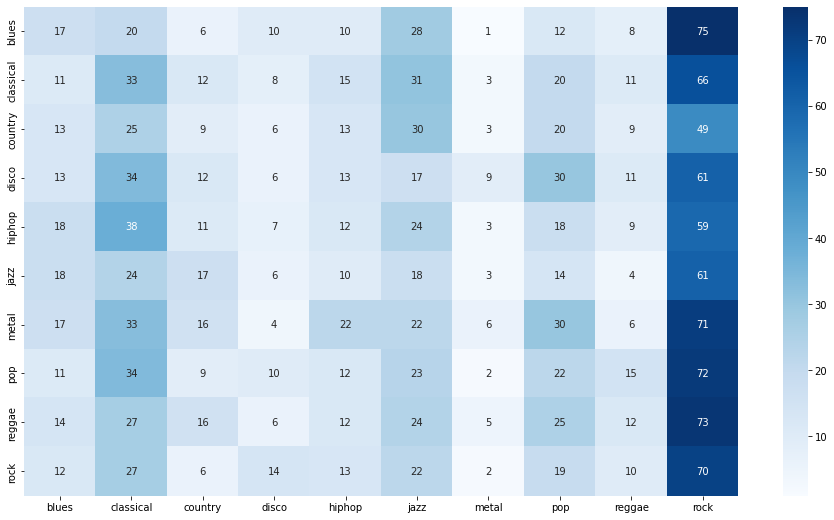

In [ ]:
param_grid = {'max_depth' : [3, 4, 5, 6],
              'n_estimators': [10, 50, 100],
              'learning_rate':[0.01, 0.05, 0.1]}

xgbrf_ = XGBRFClassifier()
grid_cv = GridSearchCV(xgbrf_, param_grid, cv=3)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# 최적 하이퍼 파라미터로 모델 학습, test data 예측 성능 확인
xgbrf_clf = XGBRFClassifier(learning_rate=grid_cv.best_params_.get('learning_rate'), max_depth=grid_cv.best_params_.get('max_depth'), n_estimators=grid_cv.best_params_.get('n_estimators'))
xgbrf_clf.fit(X_train, y_train)
pred = xgbrf_clf.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

model_assess(xgbrf_clf, X_test, y_test, pred)

### 모델 저장

In [ ]:
import pickle
import joblib

joblib.dump(nb_clf, '/content/drive/MyDrive/기계팀플/최종코드/nb_vae2.pkl')
joblib.dump(sgd_clf, '/content/drive/MyDrive/기계팀플/최종코드/sgd_vae2.pkl')
joblib.dump(knn_clf, '/content/drive/MyDrive/기계팀플/최종코드/knn_vae2.pkl')
joblib.dump(dt_clf, '/content/drive/MyDrive/기계팀플/최종코드/dt_vae2.pkl')
joblib.dump(rf_clf, '/content/drive/MyDrive/기계팀플/최종코드/rf_vae2.pkl')
joblib.dump(svm_clf, '/content/drive/MyDrive/기계팀플/최종코드/svm_vae2.pkl')
joblib.dump(lg_clf, '/content/drive/MyDrive/기계팀플/최종코드/lg_vae2.pkl')
joblib.dump(nn_clf, '/content/drive/MyDrive/기계팀플/최종코드/nn_vae2.pkl')
joblib.dump(xgb_clf, '/content/drive/MyDrive/기계팀플/최종코드/xgb_vae2.pkl')
joblib.dump(xgbrf_clf, '/content/drive/MyDrive/기계팀플/최종코드/xgbrf_vae2.pkl')

['/content/drive/MyDrive/기계팀플/최종코드/xgbrf_vae2.pkl']